In [1]:
import pandas as pd

from os import path

# Performs logic with results of FAB queries

Current logic -- organisms with rubisco and any recognizable sbpase have the CBB cycle (operationally speaking). 

Organisms with the csos2 and carboxysome shell genes have a CCM. This is only the alpha CCM for now. TODO: add beta logic. Would be curious to see beta outside the cyanos, for example. 

For FDH, H2ase and N2ase we are just looking for the focal enzymes, not the cofactor synthesis. Could add this. 

In [2]:
basedir = '../output/findabug/kegg_annotations/'
queries_df = pd.read_csv(path.join(basedir, 'queries.csv'), index_col=0)
queries_df

,query
name,
rubisco_LSU,K01601
rubisco_SSU,K01602
sbpase_bifuncI,K01086
sbpase_bifuncII,K11532
sbpaseI,K01100
sbpaseII,K22315
fdh,K00122
fdh_large,K00123
fd_h2ase,K00532


In [3]:
name = 'rubisco_LSU'
ko_SSU = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
rub_large = pd.read_csv(fname, index_col=0)

name = 'rubisco_SSU'
ko_LSU = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
rub_small = pd.read_csv(fname, index_col=0)

In [4]:
rub_genes = pd.concat([rub_large, rub_small])

# retain only those groups with an LSU and SSU
rub_genes = rub_genes.groupby('genome_id').filter(
    lambda x: ko_LSU in x['ko'].values and ko_SSU in x['ko'].values).reset_index()

# has a large and small subunit
has_rub = rub_genes['genome_id'].unique()

print(f'Found {len(has_rub)} genomes with rubisco LSU and SSU')

Found 3618 genomes with rubisco LSU and SSU


In [5]:
sbpase_names = 'sbpase_bifuncI sbpase_bifuncII sbpaseI sbpaseII'.split()
all_sbpase_dfs = []
for sbpase in sbpase_names:
    print(sbpase)
    ko = queries_df.loc[sbpase].query
    fname = path.join(basedir, f'{sbpase}.csv')
    if not path.exists(fname):
        continue
    sbpase_df = pd.read_csv(fname, index_col=0)
    all_sbpase_dfs.append(sbpase_df)

# list those genomes with any sbpase gene
all_sbpase_df = pd.concat(all_sbpase_dfs)
has_sbpase = all_sbpase_df['genome_id'].unique()
print(f'Genomes with sbpase: {len(has_sbpase)}')

sbpase_bifuncI
sbpase_bifuncII
sbpaseI
sbpaseII
Genomes with sbpase: 5448


In [6]:
fdh_names = 'fdh fdh_large'.split()
all_fdh_dfs = []
for fdh in fdh_names:
    ko = queries_df.loc[fdh].query
    fname = path.join(basedir, f'{fdh}.csv')
    if not path.exists(fname):
        continue
    fdh_df = pd.read_csv(fname, index_col=0)
    all_fdh_dfs.append(fdh_df)

# list those genomes with any fdh gene
all_fdh_df = pd.concat(all_fdh_dfs)
has_fdh = all_fdh_df['genome_id'].unique()

In [7]:
h2ase_names = [n for n in queries_df.index if 'h2ase' in n]
print(h2ase_names)

all_h2ase_dfs = []
for h2ase in h2ase_names:
    ko = queries_df.loc[h2ase].query
    fname = path.join(basedir, f'{h2ase}.csv')
    if not path.exists(fname):
        continue
    h2ase_df = pd.read_csv(fname, index_col=0)
    all_h2ase_dfs.append(h2ase_df)

# list those genomes with any h2ase gene
# TODO: some combinatorial logic here for subunits
all_h2ase_df = pd.concat(all_h2ase_dfs)
has_h2ase = all_h2ase_df['genome_id'].unique()

['fd_h2ase', 'fd_h2ase_large', 'membrane_h2ase_alpha', 'membrane_h2ase_beta', 'hoxK_h2ase_small', 'hoxG_h2ase_large', 'hoxZ_h2ase_cyt', 'hoxY_h2ase_small', 'hoxH_h2ase_large', 'hoxU_nife_h2ase_small', 'hoxF_nife_h2ase_large']


In [8]:
# got 0 hits on this one 
name = 'meoh_dehydrogenase'
assert not path.exists(path.join(basedir, f'{name}.csv'))

has_meoh = []

In [9]:
n2ase_names = 'n2ase_delta n2ase_femo_alpha n2ase_femo_beta'.split()
all_n2ase_dfs = []
for n2ase in n2ase_names:
    ko = queries_df.loc[n2ase].query
    fname = path.join(basedir, f'{n2ase}.csv')
    if not path.exists(fname):
        continue
    n2ase_df = pd.read_csv(fname, index_col=0)
    all_n2ase_dfs.append(n2ase_df)

# list those genomes with any n2ase gene
all_n2ase_df = pd.concat(all_n2ase_dfs)
has_n2ase = all_n2ase_df['genome_id'].unique()

In [10]:
basedir = '../output/findabug/pfam_annotations/'
queries_df = pd.read_csv(path.join(basedir, 'queries.csv'), index_col=0)
queries_df

,query
name,
BMC_domain,PF00936
Csos2,PF12288


In [11]:
name = 'BMC_domain'
pfam = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
bmc_df = pd.read_csv(fname, index_col=0)

has_bmc = bmc_df['genome_id'].unique()

name = 'Csos2'
pfam = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
csos2_df = pd.read_csv(fname, index_col=0)

has_csos2 = csos2_df['genome_id'].unique()

In [12]:
lists_of_genome_ids = [has_rub, has_sbpase, has_fdh, has_h2ase, has_n2ase, has_bmc, has_csos2]
all_genome_ids = set.union(*map(set, lists_of_genome_ids))
all_genome_ids = list(sorted(all_genome_ids))

# make a dataframe marking which ones were computed to have rubisco, sbpase, and fdh
df = pd.DataFrame(dict(genome_id=all_genome_ids))
df['rubisco'] = df.genome_id.isin(has_rub)
df['sbpase'] = df.genome_id.isin(has_sbpase)
df['fdh'] = df.genome_id.isin(has_fdh)
df['h2ase'] = df.genome_id.isin(has_h2ase)
df['meoh'] = df.genome_id.isin(has_meoh)
df['n2ase'] = df.genome_id.isin(has_n2ase)
df['bmc'] = df.genome_id.isin(has_bmc)
df['csos2'] = df.genome_id.isin(has_csos2)

df['knallgas'] = df['rubisco'] & df['h2ase']

# TODO: add beta csome
df['alpha_csome'] = df['csos2'] & df['bmc']
df['csome'] = df['alpha_csome']

df['rubisco_csome'] = df['rubisco'] & df['csome']
df['rubisco_csome_fdh'] = df['rubisco'] & df['csome'] & df['fdh']
df['rubisco_csome_h2ase'] = df['rubisco'] & df['csome'] & df['h2ase']
df['rubisco_csome_fdh_h2ase'] = df['rubisco'] & df['csome'] & df['fdh'] & df['h2ase']

df.to_csv('../output/findabug/chemoauto_summary.csv', index=False)

In [13]:
rownames = ['rubisco_csome']
colnames = 'fdh,h2ase'.split(',')

contingency_table = pd.crosstab(df[rownames[0]], [df[c] for c in colnames],
                                rownames=rownames, colnames=colnames)
contingency_table.to_csv('../output/findabug/CCM_contingency_table.csv')
contingency_table

fdh           False        True       
h2ase         False True   False True 
rubisco_csome                         
False          7032  7204  11517  2709
True            434   165     32    39

(434, 11517, 7204, 32, 165, 2709, 39)


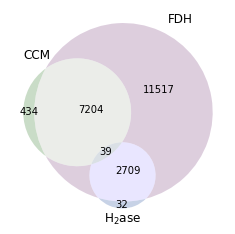

In [14]:
# Make a venn3 plot from the contingency table

from matplotlib_venn import venn3, venn2
import matplotlib.pyplot as plt
import viz

colors = viz.color_palette()

# index is rubisco_csome, columns are fdh, h2ase
# hence subset order is rubisco_csome, fdh, h2ase
# Subsets are then Abc, aBc, abC, ABc, AbC, aBC, ABC
ct = contingency_table
subsets = (ct.loc[True][False, False], ct.loc[False][True, False], ct.loc[False][False, True],
              ct.loc[True][True, False], ct.loc[True][False, True], ct.loc[False][True, True],
              ct.loc[True][True, True])
print(subsets)

plt.figure()

my_colors = [colors['green'], colors['purple'], colors['blue']]
venn3(subsets=subsets, set_labels=('CCM', 'FDH', 'H$_2$ase'), set_colors=my_colors)
plt.savefig('../output/plots/fab_venn.pdf')
plt.show()